In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("C:/Users/admin/downloads/Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df=df.select_dtypes(include=['int64','float64'])
X = df.drop("CGPA", axis=1)
y = df["CGPA"]

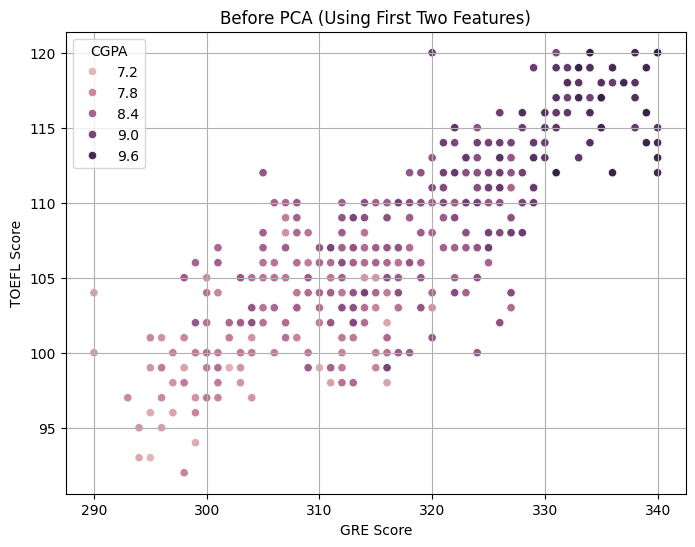

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="GRE Score",
    y="TOEFL Score",
    hue="CGPA"
)
plt.title("Before PCA (Using First Two Features)")
plt.grid(True)
plt.show()

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

In [15]:
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
df_pca["CGPA"] = y

In [16]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.60641704 0.12903933]


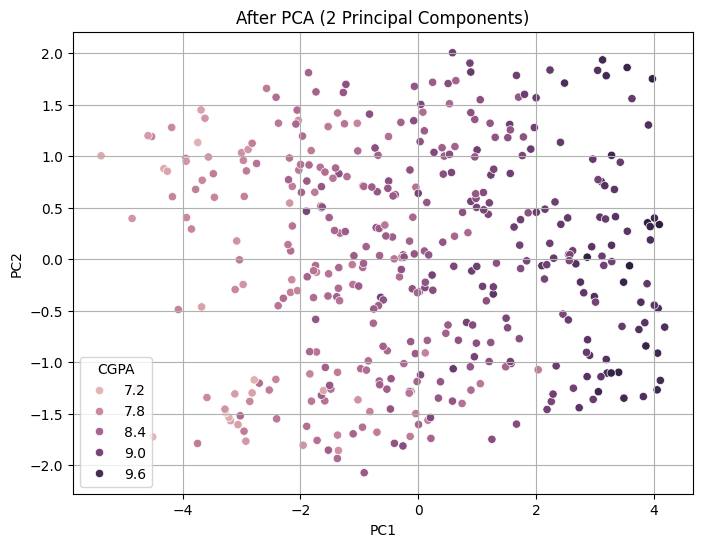

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC2",
    hue="CGPA"
)
plt.title("After PCA (2 Principal Components)")
plt.grid(True)
plt.show()